# Go-to-Market (G2M) insight for Cab Investment firm

## Problem Statment

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Data Set

There have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

## Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the datasets

In [5]:
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

## Check the data types and field names

In [6]:
cab_data.info()
customer_data.info()
transaction_data.info()
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

## Check for missing values

In [92]:
cab_data.isnull().sum()
customer_data.isnull().sum()
transaction_data.isnull().sum()
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

## Check for duplicates

In [123]:
cab_data.duplicated().sum()
customer_data.duplicated().sum()
transaction_data.duplicated().sum()
city_data.duplicated().sum()

0

## Identify relationships across the files by merging all datasets for EDA

In [124]:
master_data= pd.merge(transaction_data,customer_data).merge(cab_data, on='Transaction ID' ).merge(city_data, on = 'City')
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [125]:
master_data.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,21012.412463,12.594234,7969.409482,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,18.000000,2000.000000,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,60000.000000,65.000000,35000.000000,43465.000000,48.000000,2048.030000,691.200000


In [126]:
master_data.tail()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
359387,10307228,51406,Cash,Female,29,6829,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,10319775,51406,Cash,Female,29,6829,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,10347676,51406,Card,Female,29,6829,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,10358624,51406,Cash,Female,29,6829,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"
359391,10370709,51406,Card,Female,29,6829,43342,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,"418,859","127,001"


In [127]:
master_data.shape

(359392, 14)

## Establish the correct data type for some features

In [128]:
print(master_data['Population'].dtype) # to check the data type before
master_data['Population'] = master_data['Population'].str.replace(',','').astype('int64')
print(master_data['Population'].dtype) # to check the data type after

print(master_data['Users'].dtype)
master_data['Users'] = master_data['Users'].str.replace(',','').astype('int64')
print(master_data['Users'].dtype)

print(master_data['Payment_Mode'].dtype)
master_data['Payment_Mode'] = master_data['Payment_Mode'].astype('category')
print(master_data['Payment_Mode'].dtype)

print(master_data['Gender'].dtype)
master_data['Gender'] = master_data['Gender'].astype('category')
print(master_data['Gender'].dtype)

object
int64
object
int64
object
category
object
category


In [129]:
# Defining new features for our analysis

# Profit
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

# Profit per Kilometer
master_data['Profit per KM'] = master_data['Profit'] / master_data['KM Travelled']

In [73]:
# Age Group
def age_group(age):
    if age < 18:
        return "Under 18"
    elif age < 26:
        return "18-25"
    elif age < 41:
        return "26-40"
    elif age < 61:
        return "41-60"
    else:
        return "60+"

master_data["Age Group"] = master_data["Age"].apply(age_group).astype("category")

# Income Group
def income_group(income):
    if income <= 32048:
        return "Poor or near-poor"
    elif income <= 53413:
        return "Lower-middle class"
    elif income <= 106827:
        return "Middle class"
    elif income <= 373894:
        return "Upper-middle class"
    else:
        return "Rich"

master_data["Income Group"] = (master_data["Income (USD/Month)"]*12).apply(income_group).astype("category")

display(master_data.head())
master_data.info()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit per KM,Age Group,Income Group
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.3150,1.882266,26-40,Upper-middle class
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,281.2772,10.739870,26-40,Upper-middle class
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,194.6480,4.574571,26-40,Upper-middle class
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.6660,0.826904,26-40,Upper-middle class
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,253.9808,6.981330,26-40,Upper-middle class


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      359392 non-null  int64   
 1   Customer ID         359392 non-null  int64   
 2   Payment_Mode        359392 non-null  category
 3   Gender              359392 non-null  category
 4   Age                 359392 non-null  int64   
 5   Income (USD/Month)  359392 non-null  int64   
 6   Date of Travel      359392 non-null  int64   
 7   Company             359392 non-null  object  
 8   City                359392 non-null  object  
 9   KM Travelled        359392 non-null  float64 
 10  Price Charged       359392 non-null  float64 
 11  Cost of Trip        359392 non-null  float64 
 12  Population          359392 non-null  int64   
 13  Users               359392 non-null  int64   
 14  Profit              359392 non-null  float64 
 15  Profit per KM    

## Finding most popular Company for each city

In [74]:
city_list = []
pink_cab_city = []
yellow_cab_city = []

for city in cab_data['City'].unique():
    pink_cabs = cab_data[(cab_data['City'] == city) & (cab_data['Company'] == 'Pink Cab')].shape[0]
    yellow_cabs = cab_data[(cab_data['City'] == city) & (cab_data['Company'] == 'Yellow Cab')].shape[0]
    city_list.append(city)
    pink_cab_city.append(pink_cabs)
    yellow_cab_city.append(yellow_cabs)

print(pink_cab_city)
print(yellow_cab_city)
print(city_list)

[1762, 1868, 5186, 9361, 1380, 1394, 19865, 2002, 1841, 13967, 1513, 864, 682, 1334, 10672, 2732, 3797, 799, 3692]
[5795, 3028, 24506, 47264, 5637, 2431, 28168, 4452, 1169, 85918, 2469, 1200, 631, 1033, 9816, 5265, 4722, 1132, 40045]
['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']


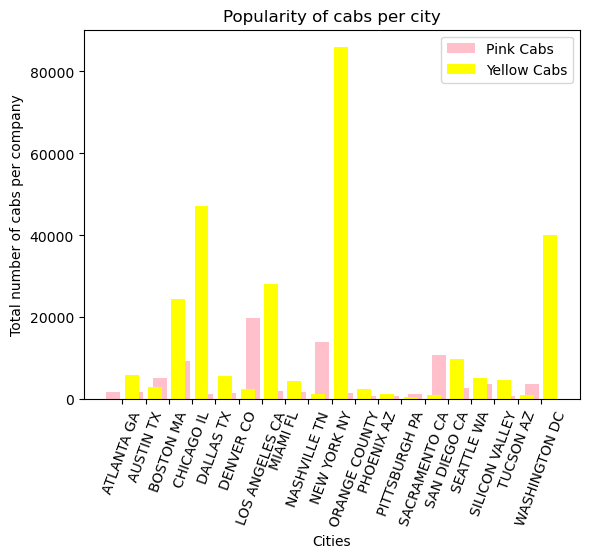

In [79]:
X_axis = np.arange(len(city_list))
plt.bar(X_axis - 0.4, pink_cab_city, 0.6, color = 'pink', label = 'Pink Cabs')
plt.bar(X_axis + 0.4, yellow_cab_city, 0.6, color = 'yellow', label = 'Yellow Cabs')

plt.xticks(X_axis, city_list, rotation=70)
plt.xlabel("Cities")
plt.ylabel("Total number of cabs per company")
plt.title("Popularity of cabs per city")
plt.legend()
plt.show()

## Age distribution of users

[Text(0.5, 1.0, 'Age Distribution for Yellow Cab')]

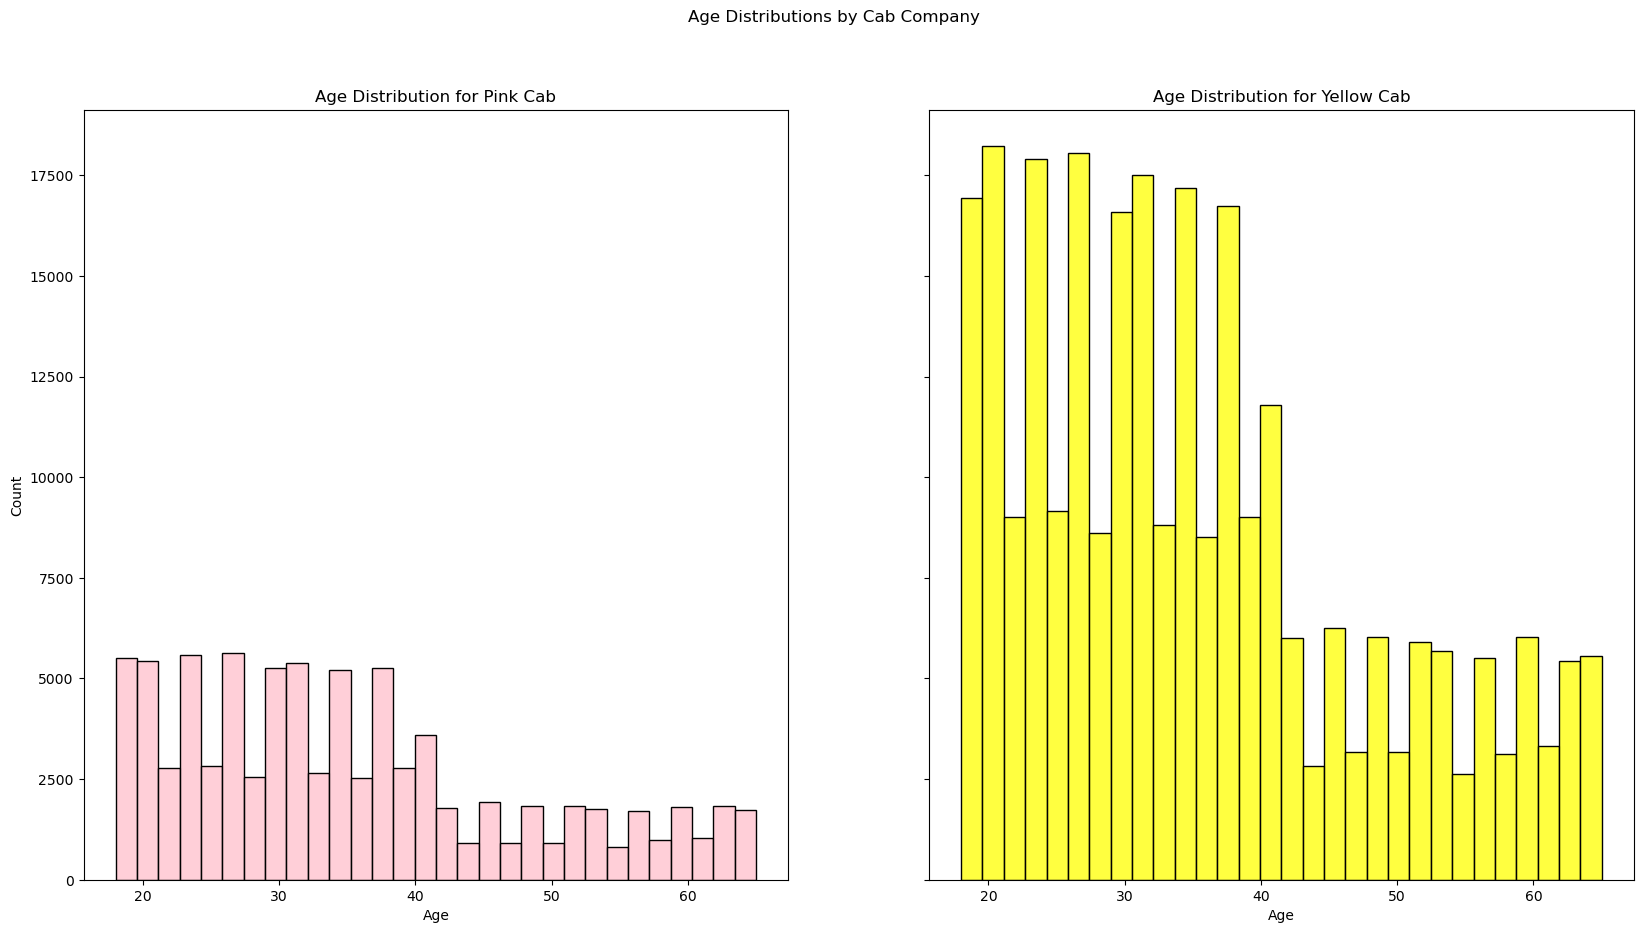

In [130]:
# Seprate the master dateset in to pink_dataset and yellow_dataset
pink_dataset = master_ds[master_ds['Company'] == 'Pink Cab'] 
yellow_dataset = master_ds[master_ds['Company'] == 'Yellow Cab']

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle("Age Distributions by Cab Company")

sns.histplot(ax=axes[0], data=pink_dataset, x='Age', color="pink", bins=30).set(title="Age Distribution for Pink Cab")
sns.histplot(ax=axes[1], data=yellow_dataset, x='Age', color="yellow", bins=30).set(title="Age Distribution for Yellow Cab")


## Cab users per city

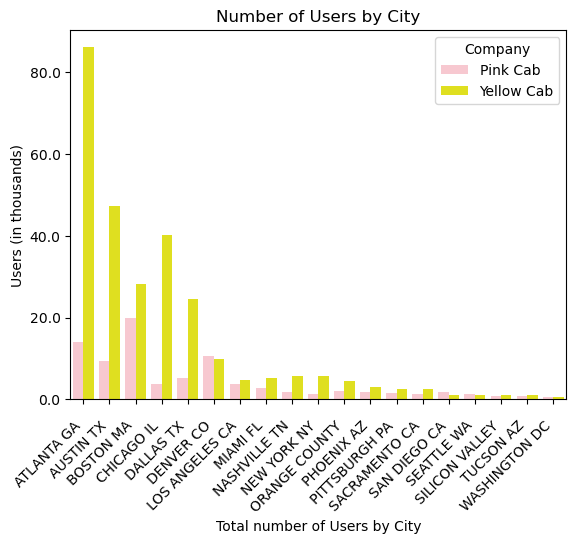

In [135]:
city_group_df = master_data.groupby(['Company', 'City'])['Users'].count().reset_index()
ax = sns.barplot(x = 'City', y = 'Users', data = city_group_df, hue = 'Company', palette = ['pink','yellow'], order = master_data.groupby(['City'])['Users'].count().reset_index().sort_values('Users', ascending=False).City)
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_ylabel('Users (in thousands)')
ax.set_xlabel('Total number of Users by City')
ax.set_title('Number of Users by City')

# Set positions and labels for x-ticks
positions = np.arange(len(city_group_df['City'].unique()))
labels = city_group_df['City'].unique()
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45, ha='right') # Rotate x-axis labels by 45 degrees and align to the right
ax.tick_params(axis='x', which='major', pad=10) # Add extra padding between tick labels and axis

## Company having users with better income

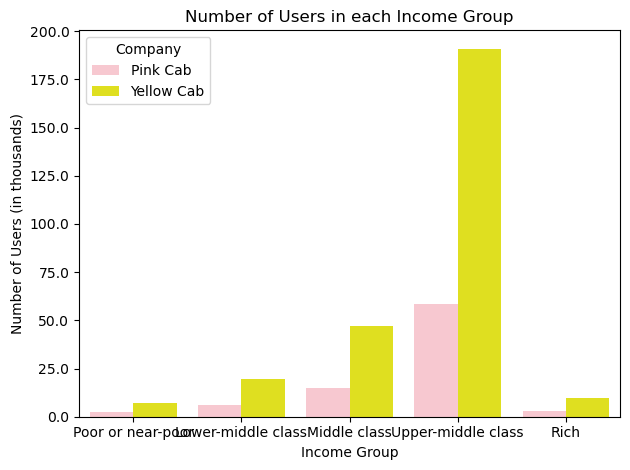

In [82]:
from matplotlib.ticker import FuncFormatter

income_group_df = master_data.groupby(['Company', 'Income Group'])['Users'].count().reset_index()

ax = sns.barplot(x = 'Income Group', y = 'Users', data = income_group_df, hue = 'Company', palette = ['pink','yellow'], order = ['Poor or near-poor','Lower-middle class','Middle class','Upper-middle class','Rich'])

thousands_formatter = lambda x, pos: f'{x / 1000}'

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.set_ylabel('Number of Users (in thousands)')
ax.set_title('Number of Users in each Income Group')
ax.set_xlabel('Income Group')

plt.tight_layout()
plt.show()

## Kilometer travelled by each cab company

Text(0, 0.5, 'Frequency')

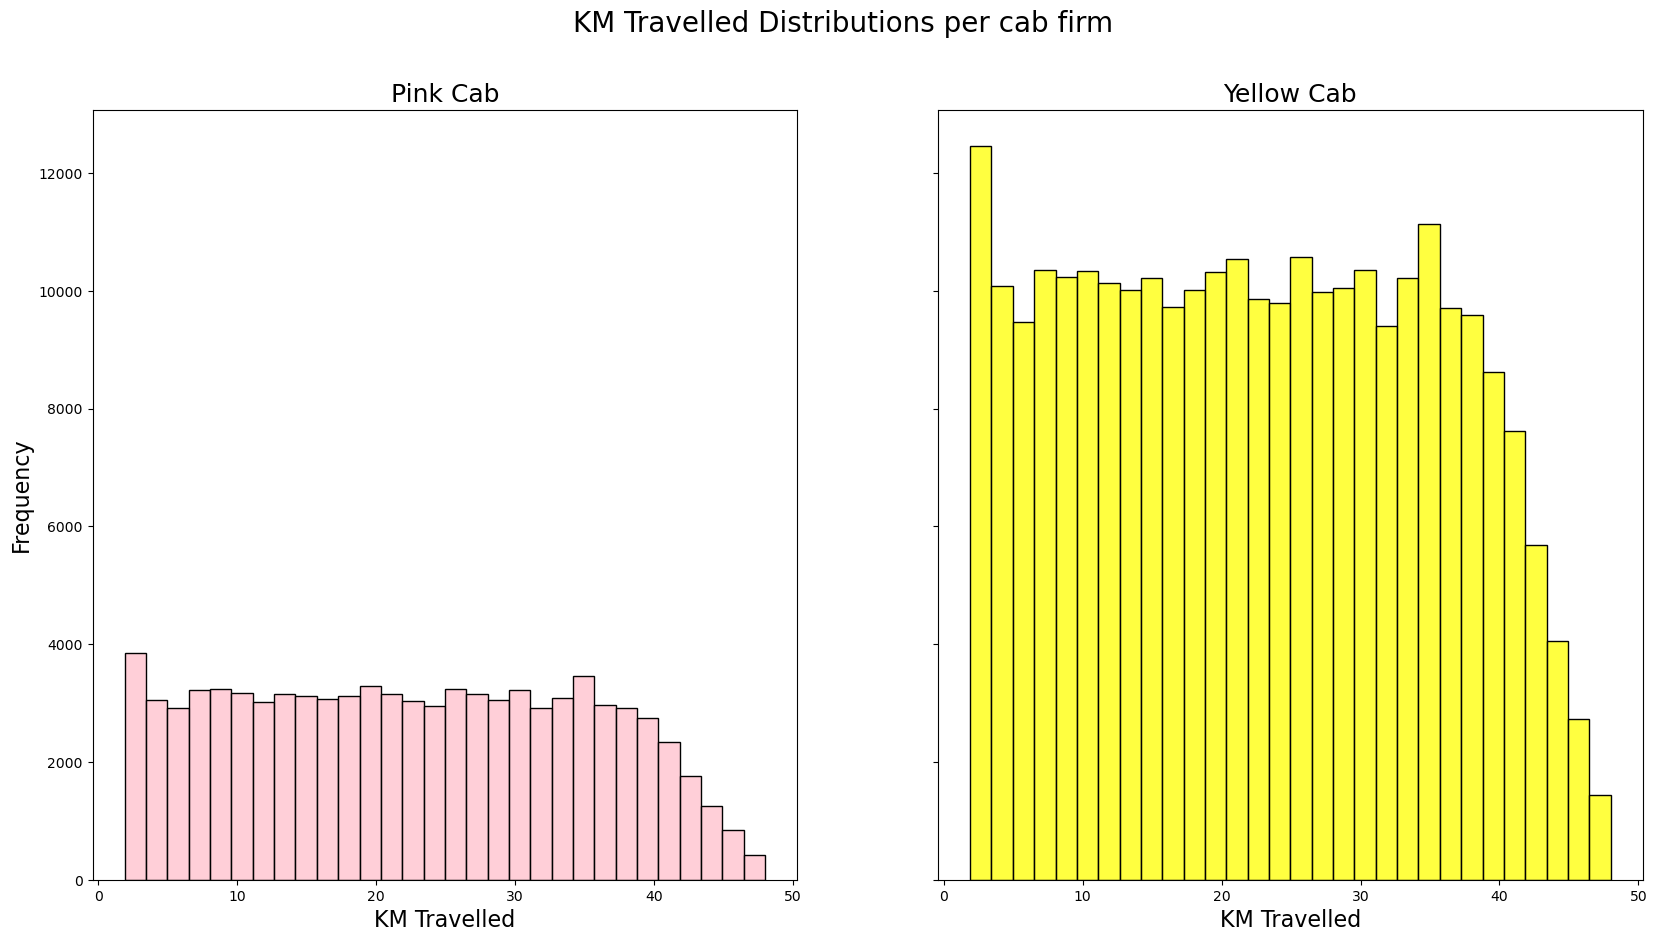

In [84]:
fig,axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle("KM Travelled Distributions per cab firm", fontsize=20)
sns.histplot(ax=axes[0],data=pink_dataset, x='KM Travelled', color="pink", bins=30).set_title("Pink Cab", fontsize=18)
sns.histplot(ax=axes[1],data=yellow_dataset, x='KM Travelled', color="yellow", bins=30).set_title("Yellow Cab", fontsize=18)

# Set x-axis label for both subplots
for ax in axes.flat:
    ax.set_xlabel("KM Travelled", fontsize=16)

# Set y-axis label for the first subplot
axes[0].set_ylabel("Frequency", fontsize=16)

## Cost of trip of each can company

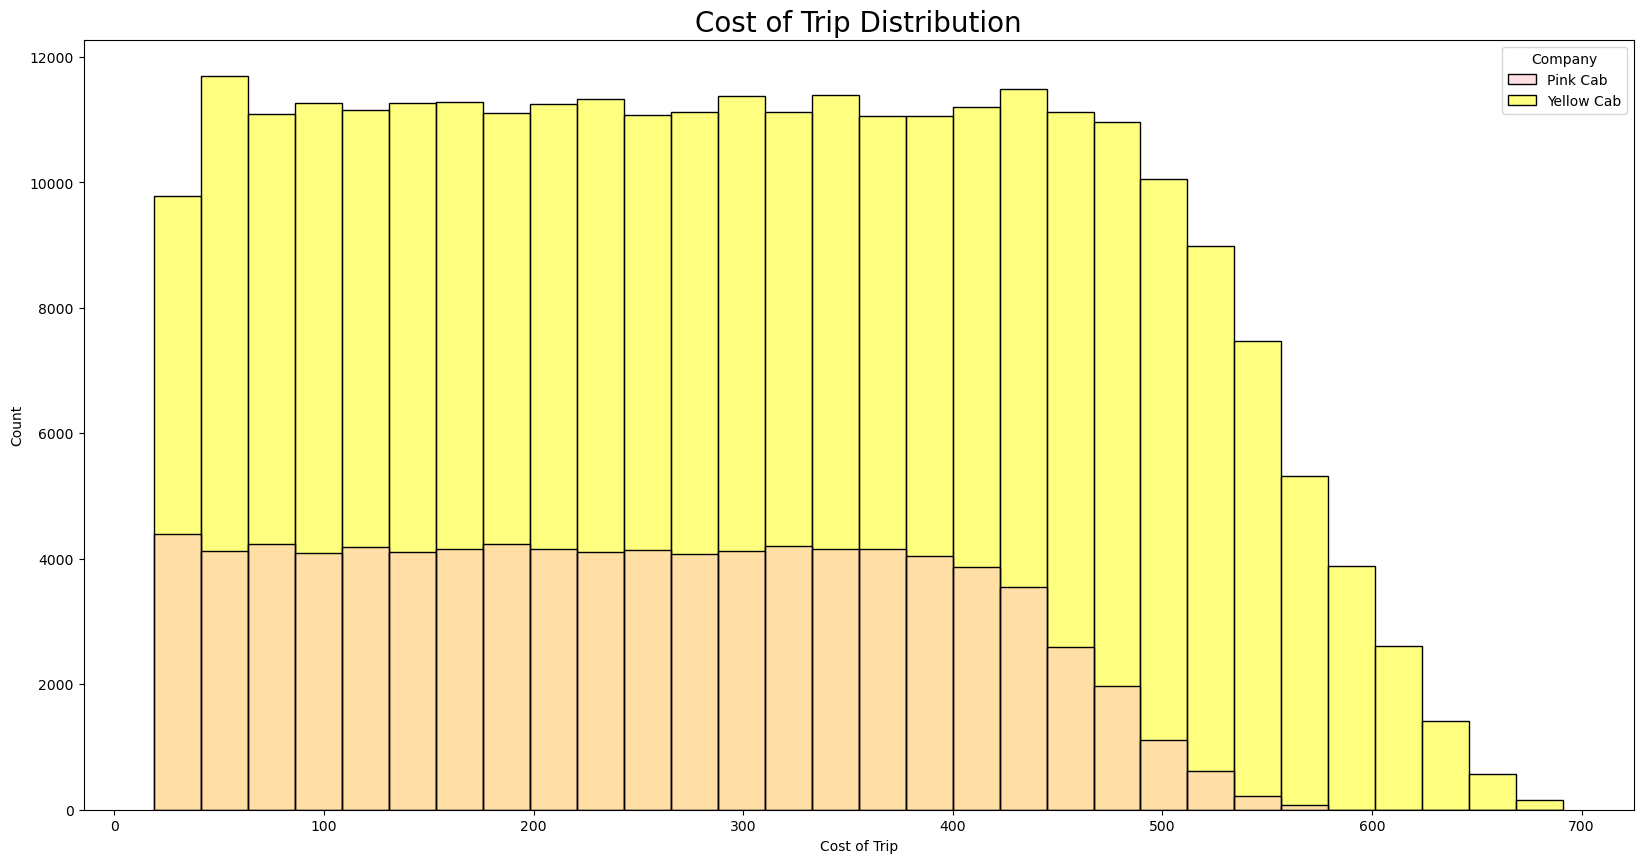

In [85]:
plt.figure(figsize=(20,10))
sns.histplot(data=master_ds, x="Cost of Trip",bins=30 , hue="Company", palette=['pink', 'yellow'])
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Cost of Trip')
plt.show()

## Relation between data

In [76]:
selected_columns =['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'Population' , 'Users']
data_relation = master_ds[selected_columns]
data_relation.head()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
0,30.45,370.95,313.6350,28,10813,"814,885","24,701"
1,26.19,598.70,317.4228,28,10813,"814,885","24,701"
2,42.55,792.05,597.4020,28,10813,"814,885","24,701"
3,28.62,358.52,334.8540,27,9237,"814,885","24,701"
4,36.38,721.10,467.1192,27,9237,"814,885","24,701"


In [77]:
corelation= data_relation.corr()
corelation.head()

/var/folders/23/hkrl6spn22n_69sh9c28db140000gn/T/ipykernel_9231/3026396123.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation= data_relation.corr()


,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
KM Travelled,1.000000,0.835753,0.981848,-0.000369,-0.000544
Price Charged,0.835753,1.000000,0.859812,-0.003084,0.003228
Cost of Trip,0.981848,0.859812,1.000000,-0.000189,-0.000633
Age,-0.000369,-0.003084,-0.000189,1.000000,0.003907
Income (USD/Month),-0.000544,0.003228,-0.000633,0.003907,1.000000


## Kilometer Travelled per Price Charged & Cost of trip

Text(0.5, 1.0, 'Cost of Trip - KM Travelled')

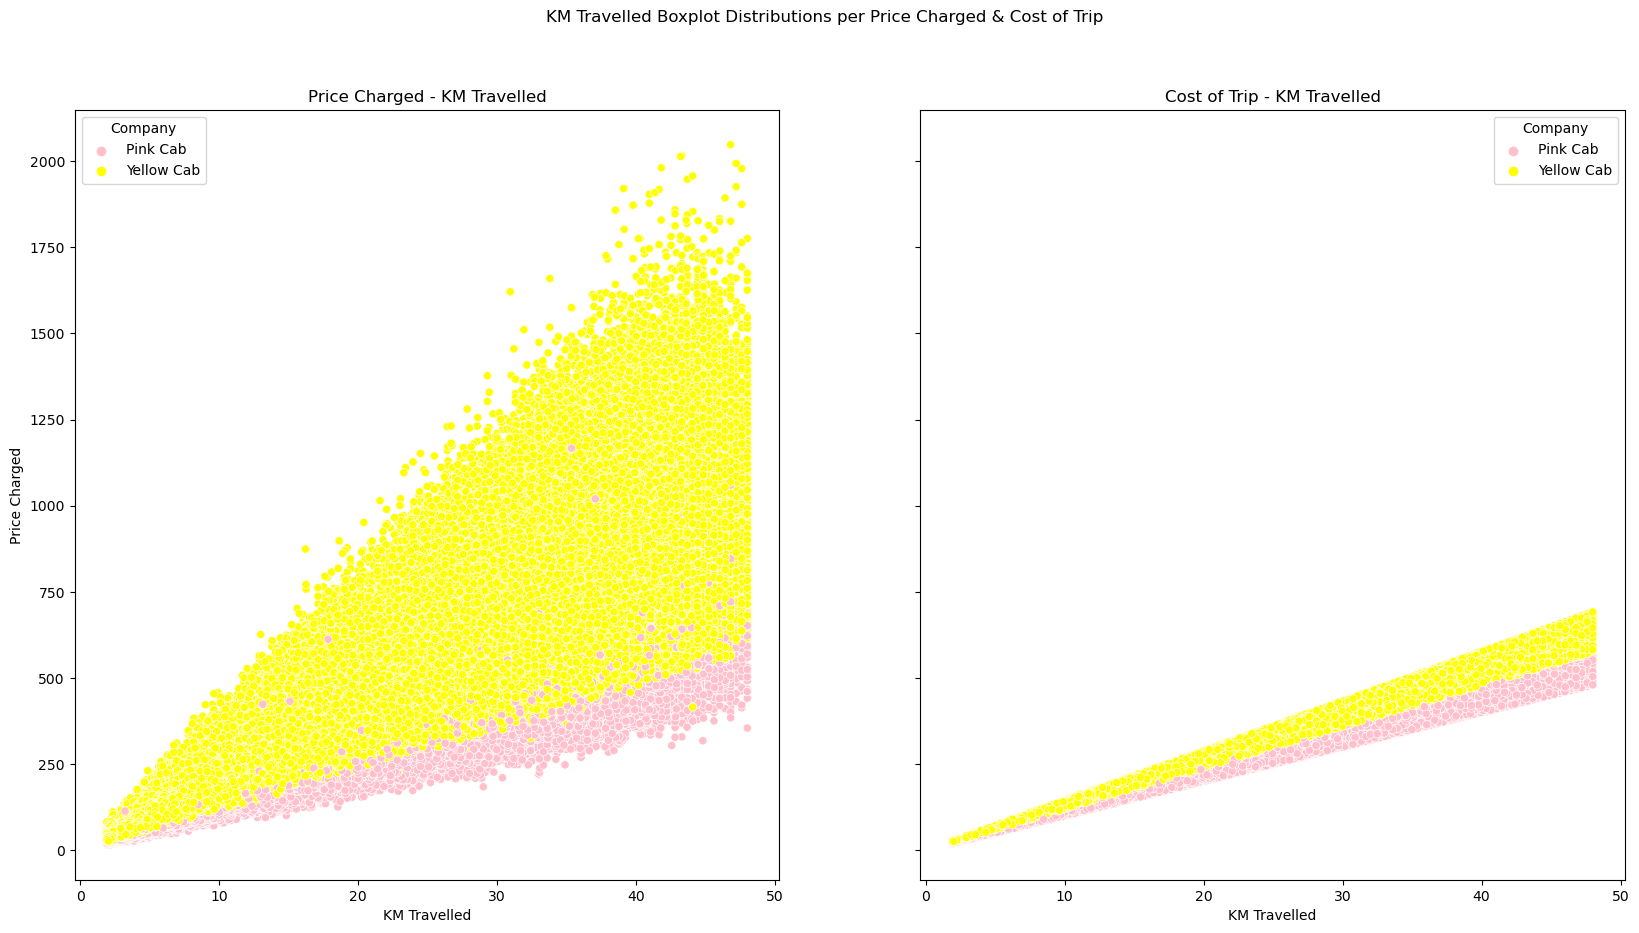

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('KM Travelled Boxplot Distributions per Price Charged & Cost of Trip')
sns.scatterplot(ax=axes[0], data=master_data, x='KM Travelled', y='Price Charged', hue="Company", palette=['pink', 'yellow']).set_title("Price Charged - KM Travelled")
sns.scatterplot(ax=axes[1], data=master_data, x='KM Travelled', y='Cost of Trip', hue="Company", palette=['pink', 'yellow']).set_title("Cost of Trip - KM Travelled")

## Conclusion

Following the analysis, we can state that the yellow company is the one in which the investment should be made, and as a result, it is the one that will make the most money and attract the most customers. The reasons for this are as follows:

1. Yellow cab is more popular in cities than pink cab.
2. People of all age use more yellow cab than pink cab.
3. Majority of the cab users take yellow can more than pink can in each city.
4. Every income group people prefer to use more yellow can than pink cab.
5. Distance travelled by yellow cab is more than pink cab.
6. Cost of trip for yellow cab is more than pink cab.
7. The profit generated by yellow cab is more than pink cab.

Taking into account all of these findings following the exploratory data analysis, we strongly recommend investing in the yellow cab industry.
